## <font color=#0099CC>mIAx - Taller Renta Fija - ANÁLISIS CARTERA DE RENTA FIJA</font>

En esta práctica, desarrollaremos un análisis relativamente exahustivo de un universo de Renta Fija, en concreto, de bonos corporativos. Además, construiremos y analizaremos varias carteras. 

Para ello, contaremos con la siguiente información almacenada en la carpeta *data*:
- Universo de bonos, con sus características esenciales (fichero *universo.csv*)
- Histórico de precios de cierre del universo de bonos anterior (fichero *precios_historicos_universo.csv*)
- Curva de tipos de interés €STR (fichero *curvaESTR.csv*)
- Histórico de precios de otros índices que nos serán de utilidad (fichero *precios_historicos_varios*):
    - Índices de crédito: ITRAXX Main y ITRAXX XOVER. Serán útiles para la cobertura del riesgo de crédito.
    - Futuros sobre el *Schatz* (DU1), *BOBL* (OE1) y *BUND* (RX1). Serán útiles para la cobertura de los tipos de interés.
    - Índice de crédito *RECMTREU*, que valdría como benchmark de las carteras que construyamos.

No necesariamente se usará toda toda la información

En líneas generales, estos son los ejercicios que completaremos, aunque los detallaremos más en cada apartado:
1. Análisis de datos. En esta sección, haremos un análisis de la información que tenemos de cada bono y lo que significa. Asimismo, haremos los tratamientos y limpieza que necesitemos para luego poder usarlos.
2. Valoración de los bonos del universo utilizando la curva de descuento y bajo ciertas asunciones. Comparación de estos precios con los precios de mercado.
3. Cálculo del spread que pagan los bonos sobre la curva.
4. Cálculo de *yield*, duración y convexidad.
5. Contrucción de una cartera equiponderada con todos los bonos del universo. Contraste con el benchmark (os proponemos el índice RECMTREU para el que os hemos dado los precios) y backtest de la estrategia. ¡OJO! El índice es *Total Return*.
6. Tienes el mandato de construir una cartera de como máximo **20** bonos corporativos con ese universo y una serie de restricciones y, claro, maximizando la rentabilidad total de la cartera:
    - La duración de la cartera no debe superar los 3 años
    - La exposición a emisiones HY no puede superar el 10% de la cartera
    - No puedes invertir en deuda subordinada
    - No se puede invertir en emisiones de tamaño igual o inferior a 500 millones
    - No se puede invertir más de un 10% del capital en una misma emisión
    - No puede haber más de un 15% de concentración en un mismo emisor
    (¡OJO! No estamos teniendo en cuenta en este ejercicio si hubiera un mínimo de inversión, lo cuál sería un dato relevante tener en cuenta en un caso real)

    6.1. Constrúyela a fecha de hoy

    6.2. Teniendo en cuenta la naturaleza que nos están pidiendo para la cartera, ¿añadirías alguna otra restricción?

    6.3. ¿Cómo medirías el riesgo de crédito de la cartera?

    6.4. ¿Cómo medirías el riesgo de liquidez de la cartera?

    6.5. Describe cómo habría que hacer el backtest de esta cartera
7. Ahora, se te pide que cubras la exposición de la cartera a los tipos de interés. Con la información que tienes, ¿cómo lo harías?
8. ¿Y si quisieras cubrir total o parcialmente el riesgo de crédito? Usa de nuevo la información que tienes.
9. ¿Cómo construirías tu cartera? ¿Se te ocurre alguna estrategia específica, por ejemplo, de valor relativo?


📣 <font color=#CC6600>**¡NORMAS!**</font>

La práctica se puede hacer en grupos de hasta **3 personas** y deberá entregarse antes del **27 de noviembre**. 

Cada grupo expondrá una parte de los ejercicios en la clase del día 27, donde la resolveremos juntos a modo de taller. Esta exposición contará hasta **1 punto** de la nota final.

Además, se valorará positivamente para la práctica la participación en las clases.

📣 <font color=#CC6600>**¡IMPORTANTE!**</font>

Todo el código implementado debe estar debidamente comentado e incluir conclusiones de los resultados obtenidos para optar a la máxima puntuación. Asimismo, se debe responder a las preguntas planteadas.

Las propuestas de mejora o posibles trabajos futuros se valorarán positivamente también.

Usa las fuentes de información que consideres necesarias para apoyar tus respuestas.

### <font color=#336699>Librerías</font>

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [154]:
# Estilo
plt.style.use('dark_background')

In [155]:
# Fecha de análisis
fecha_analisis = pd.to_datetime('2025-10-01')

In [156]:
### Import the csv files with the data while indexing first column as date

#############################################

curvaESTR = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\curvaESTR.csv', sep=';', index_col=0, parse_dates=True)

#############################################

precios_historicos_universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\precios_historicos_universo.csv', sep=';')

## Rename first column to Date
precios_historicos_universo = precios_historicos_universo.rename(columns={'Unnamed: 0': 'Date'})
### Set Date as index
precios_historicos_universo = precios_historicos_universo.set_index('Date')
### Transpose the DataFrame to have timeseries in rows and assets in columns
precios_historicos_universo = precios_historicos_universo.T

#############################################

precios_historicos_varios = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\precios_historicos_varios.csv', sep=';', index_col=0, parse_dates=True)

#############################################

universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\universo.csv', sep=';', index_col=0, parse_dates=True)

C:\Users\javie\AppData\Local\Temp\ipykernel_47432\1640579583.py:9: DtypeWarning: Columns (2,3,4,5,6,9,10,11,12,13,16,17,18,19,20,23,24,25,26,27,30,31,32,33,34,37,38,39,40,41,44,45,46,47,48,51,52,53,54,55,58,59,60,61,62,65,66,67,68,75,89,90,185,219,240,248,275,319,331,415,454,458,473,563,564,565,571,572,573,576,577,578,580,583,604,695) have mixed types. Specify dtype option on import or set low_memory=False.
  precios_historicos_universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Locales Javier\\SICAV\\00-NUEVO ONE DRIVE SH CAPITAL INVESTMENTS\\13. Python\\5. Python Scripts\\.vscode\\MIAX Master\\Modulo 2 - Practica\\data\\precios_historicos_universo.csv', sep=';')
C:\Users\javie\AppData\Local\Temp\ipykernel_47432\1640579583.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  universo = pd.read_csv('C:\\Users\\javie\\OneDrive\\Finanzas Loc

### <font color=#336699>1. Datos</font>

<style>.gray {background-color: #595959}

</style><div class="gray">❕💬¿Qué observas en los datos? Analiza la información que tenemos del universo</div>

Haz un primer análisis visual de la información que tenemos del universo de bono.
Entre otras, plantéate cuestiones como:
- ¿Divisas?
- ¿Tipo de bonos? ¿Fijo/Flotante? ¿Prelación? ¿Opcionalidad? ¿Hay bonos perpetuos?
- ¿Sectores? ¿Emisores? Si invirtéramos en todos los bonos, ¿dirías a priori que la cartera está diversificada?
- ¿Ratings? (Riesgo de crédito)
- ¿Otros datos cuantitativos?
    - Riesgo de liquidez - Horquillas y nominal vivo
- ¿Hay *gaps* en la información que vamos a tener que tratar?

In [157]:
# universo.columns
# # universo['Coupon Type'].unique()
# universo['Callable'].unique()
# # universo['Seniority'].unique()
# # universo['Ccy'].unique()
# universo['Rating'].unique()
# # universo['Industry Sector'].unique()
# universo['Rating'].unique()
# universo['Rating'].unique()
# universo['Rating'].unique()
# universo['PD 1YR'].unique()




#### <font color=#808080>Divisas</font>

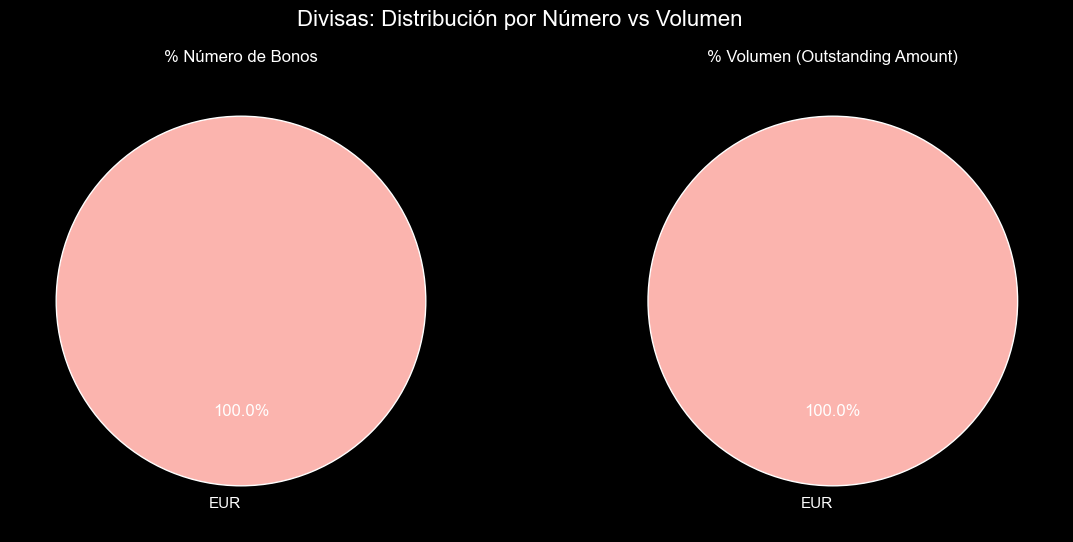

In [158]:
# --- DIVISAS: Conteo vs Volumen ---

# 1. Preparar datos agregados
df_ccy = universo.groupby('Ccy').agg({
    'Description': 'count',          # Conteo de bonos
    'Outstanding Amount': 'sum'      # Suma de nominales
}).rename(columns={'Description': 'Count', 'Outstanding Amount': 'Volume'})

# 2. Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Divisas: Distribución por Número vs Volumen', fontsize=16)

# Gráfico A: Porcentaje de Bonos (Count)
df_ccy['Count'].plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, cmap='Pastel1', ylabel=''
)
axes[0].set_title('% Número de Bonos')

# Gráfico B: Porcentaje de Dinero (Volume)
df_ccy['Volume'].plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='Pastel1', ylabel=''
)
axes[1].set_title('% Volumen (Outstanding Amount)')

plt.show()

#### <font color=#808080>Distribución Sectorial</font>


C:\Users\javie\AppData\Local\Temp\ipykernel_47432\3076987439.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sector_pct['Count %'], y=df_sector_pct.index, ax=axes[0], palette='viridis')
C:\Users\javie\AppData\Local\Temp\ipykernel_47432\3076987439.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sector_pct['Volume %'], y=df_sector_pct.index, ax=axes[1], palette='viridis')


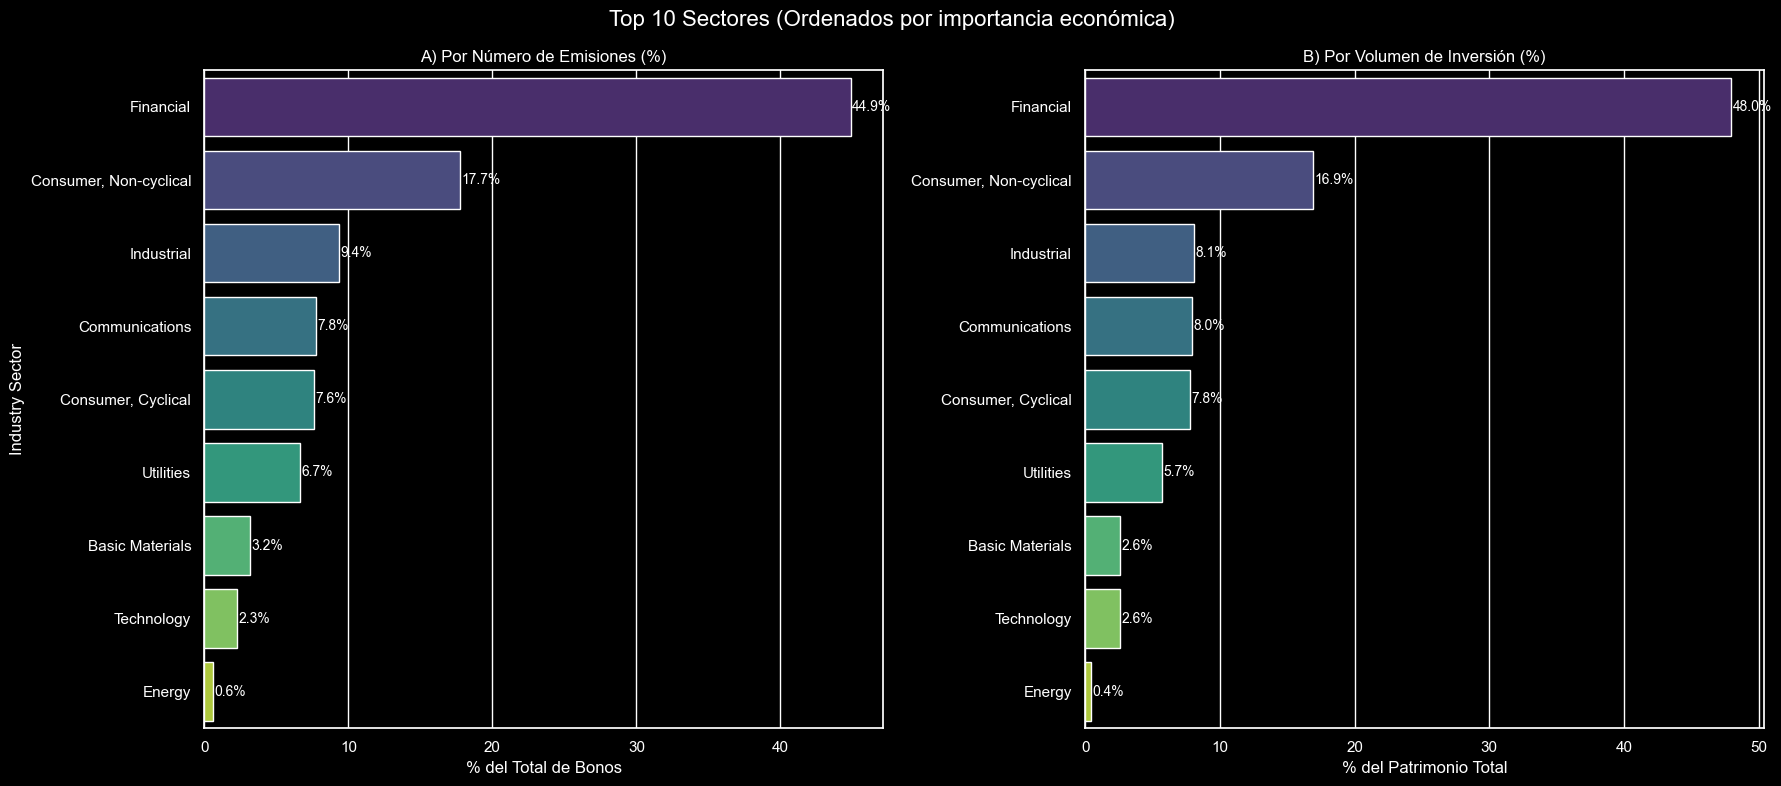

In [159]:
# --- Visualización: Distribución Sectorial (Top 10) ---

# 1. Agrupar datos por Sector
# Ordenamos por Volumen (Outstanding Amount) para sacar los 10 sectores con más dinero,
# que son los relevantes para el riesgo de cartera.
df_sector = universo.groupby('Industry Sector').agg({
    'Description': 'count',
    'Outstanding Amount': 'sum'
}).sort_values('Outstanding Amount', ascending=False).head(10)

# 2. Calcular porcentajes del total
total_count = universo['Description'].count()
total_vol = universo['Outstanding Amount'].sum()

df_sector_pct = pd.DataFrame()
df_sector_pct['Count %'] = (df_sector['Description'] / total_count) * 100
df_sector_pct['Volume %'] = (df_sector['Outstanding Amount'] / total_vol) * 100

# 3. Visualización (Orden Invertido)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Top 10 Sectores (Ordenados por importancia económica)', fontsize=16)

# Gráfico A: Por Número de Bonos (AHORA PRIMERO)
sns.barplot(x=df_sector_pct['Count %'], y=df_sector_pct.index, ax=axes[0], palette='viridis')
axes[0].set_title('A) Por Número de Emisiones (%)')
axes[0].set_xlabel('% del Total de Bonos')

# Etiquetas A
for i, v in enumerate(df_sector_pct['Count %']):
    axes[0].text(v + 0.1, i, f'{v:.1f}%', va='center', fontsize=10)

# Gráfico B: Por Volumen de Inversión (AHORA SEGUNDO)
sns.barplot(x=df_sector_pct['Volume %'], y=df_sector_pct.index, ax=axes[1], palette='viridis')
axes[1].set_title('B) Por Volumen de Inversión (%)')
axes[1].set_xlabel('% del Patrimonio Total')
axes[1].set_ylabel('') # Ocultamos etiquetas del eje Y para limpiar, ya que son las mismas

# Etiquetas B
for i, v in enumerate(df_sector_pct['Volume %']):
    axes[1].text(v + 0.1, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### <font color=#808080>Concentración Top 10 Emisores</font>


C:\Users\javie\AppData\Local\Temp\ipykernel_47432\2863298125.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


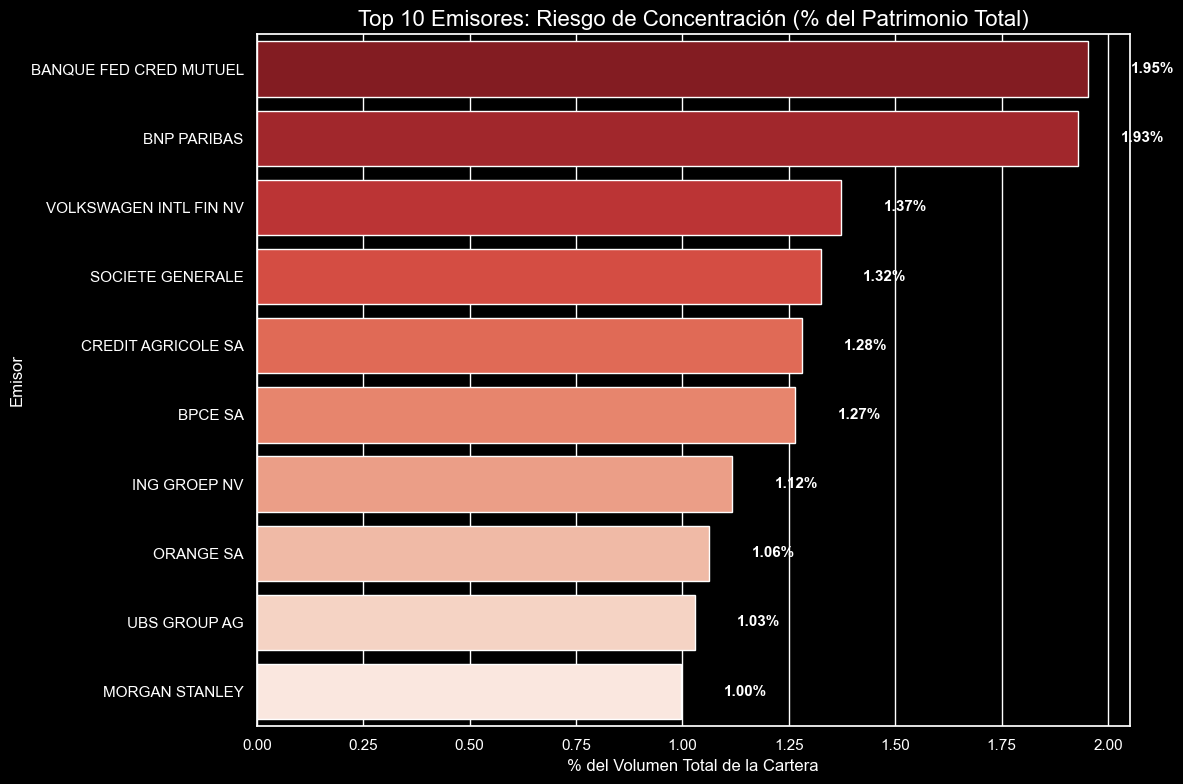

El Top 10 de emisores concentra el 13.33% del total de la cartera.


In [160]:
# --- Visualización: Top 10 Emisores por Volumen (%) ---

# 1. Agrupar por Emisor y sumar el volumen (Outstanding Amount)
top_emisores = universo.groupby('Issuer')['Outstanding Amount'].sum().sort_values(ascending=False).head(10)

# 2. Calcular el porcentaje respecto al volumen TOTAL de la cartera
total_volumen = universo['Outstanding Amount'].sum()
top_emisores_pct = (top_emisores / total_volumen) * 100

# 3. Visualización
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontales
ax = sns.barplot(
    x=top_emisores_pct.values, 
    y=top_emisores_pct.index, 
    palette='Reds_r' # Usamos rojos para denotar 'Riesgo' de concentración
)

plt.title('Top 10 Emisores: Riesgo de Concentración (% del Patrimonio Total)', fontsize=16)
plt.xlabel('% del Volumen Total de la Cartera')
plt.ylabel('Emisor')

# 4. Añadir etiquetas de datos
for i, v in enumerate(top_emisores_pct.values):
    ax.text(v + 0.1, i, f'{v:.2f}%', va='center', fontsize=11, fontweight='bold')

# (Opcional) Línea de referencia de "Límite UCITS" (muchos fondos no pueden tener >5% o >10% en un emisor)
# plt.axvline(x=5, color='black', linestyle='--', label='Límite 5% (Ref. UCITS)')
# plt.legend()

plt.tight_layout()
plt.show()

# Dato extra para tu análisis escrito:
print(f"El Top 10 de emisores concentra el {top_emisores_pct.sum():.2f}% del total de la cartera.")

#### <font color=#808080>Distribución de principales</font>


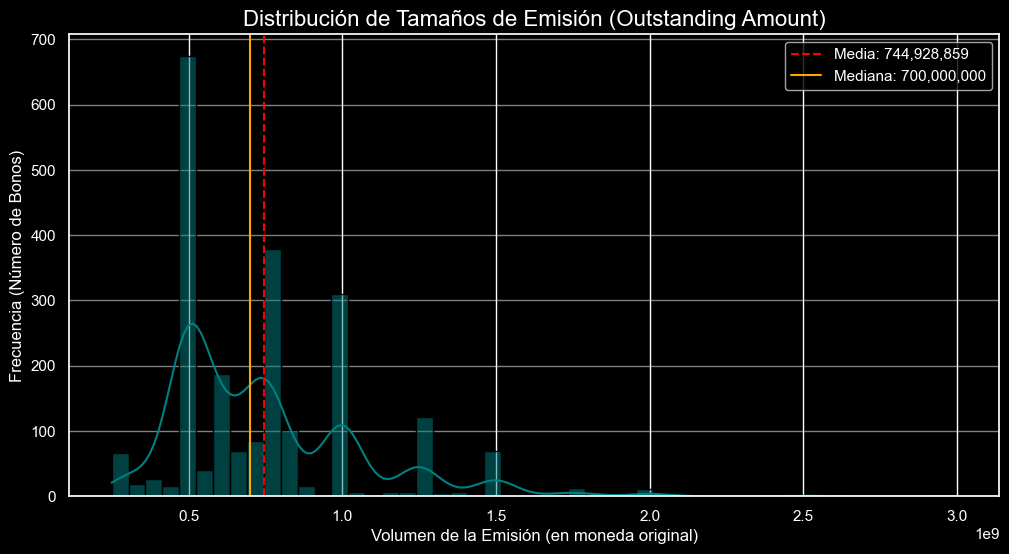

In [161]:
# --- Visualización: Histograma de Tamaños de Emisión ---

plt.figure(figsize=(12, 6))

# Creamos el histograma con curva de densidad (KDE)
sns.histplot(
    universo['Outstanding Amount'], 
    bins=50, 
    kde=True, 
    color='teal',
    edgecolor='black'
)

plt.title('Distribución de Tamaños de Emisión (Outstanding Amount)', fontsize=16)
plt.xlabel('Volumen de la Emisión (en moneda original)')
plt.ylabel('Frecuencia (Número de Bonos)')

# OPCIONAL: Si hay emisiones gigantes que "aplastan" el gráfico, descomenta esta línea:
# plt.xscale('log') 

# Añadimos líneas de media y mediana para referencia
plt.axvline(universo['Outstanding Amount'].mean(), color='red', linestyle='--', label=f"Media: {universo['Outstanding Amount'].mean():,.0f}")
plt.axvline(universo['Outstanding Amount'].median(), color='orange', linestyle='-', label=f"Mediana: {universo['Outstanding Amount'].median():,.0f}")

plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()


#### <font color=#808080>Tipos de bono</font>

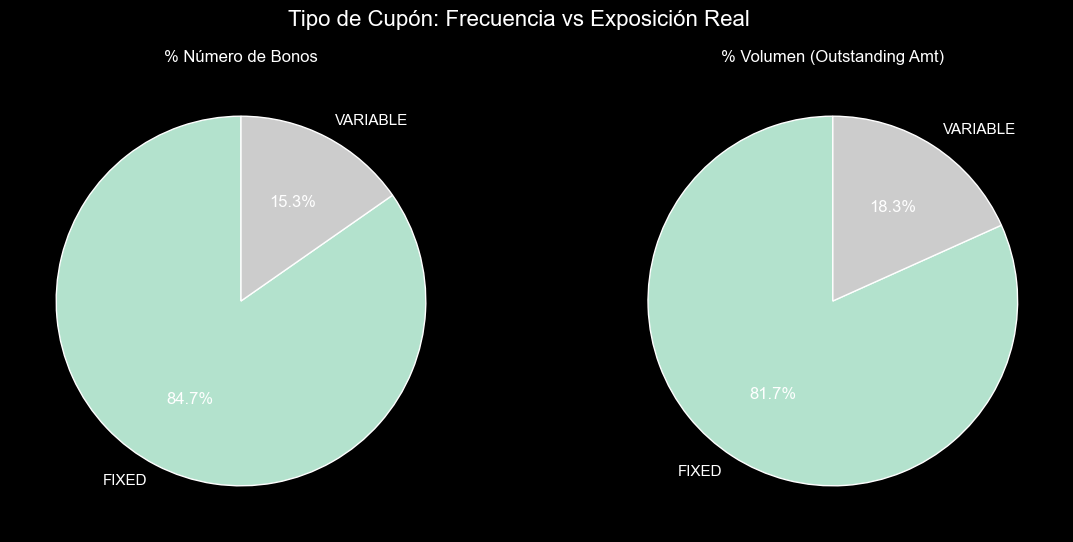

In [162]:
# --- TIPO DE CUPÓN: Conteo vs Volumen ---

# 1. Preparar datos
df_coupon = universo.groupby('Coupon Type').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
})

# 2. Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Tipo de Cupón: Frecuencia vs Exposición Real', fontsize=16)

# Count
df_coupon['Description'].plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, cmap='Pastel2', ylabel=''
)
axes[0].set_title('% Número de Bonos')

# Volume
df_coupon['Outstanding Amount'].plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='Pastel2', ylabel=''
)
axes[1].set_title('% Volumen (Outstanding Amt)')

plt.show()

#### <font color=#808080>Callabale / Opcionalidad</font>

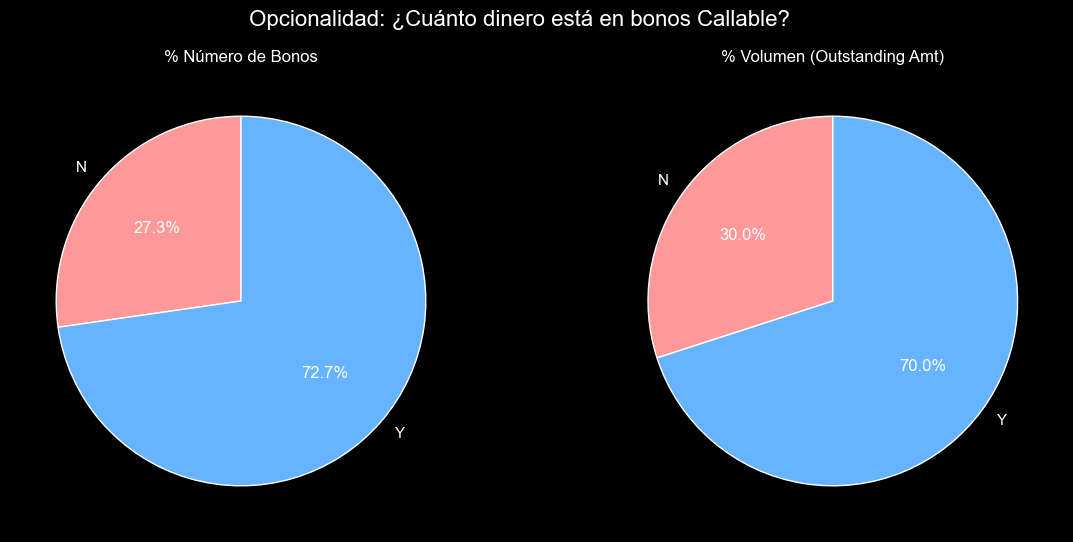

In [163]:
# --- OPCIONALIDAD: Conteo vs Volumen ---

# 1. Preparar datos
df_call = universo.groupby('Callable').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
})

# 2. Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Opcionalidad: ¿Cuánto dinero está en bonos Callable?', fontsize=16)

colors_call = ['#ff9999','#66b3ff'] # Rojo/Azul suave

# Count
df_call['Description'].plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, colors=colors_call, ylabel=''
)
axes[0].set_title('% Número de Bonos')

# Volume
df_call['Outstanding Amount'].plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, colors=colors_call, ylabel=''
)
axes[1].set_title('% Volumen (Outstanding Amt)')

plt.show()

#### <font color=#808080>Prelación / Seniority</font>

C:\Users\javie\AppData\Local\Temp\ipykernel_47432\258857196.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Description'], ax=axes[0], palette='Blues_r')
C:\Users\javie\AppData\Local\Temp\ipykernel_47432\258857196.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Outstanding Amount'], ax=axes[1], palette='Blues_r')


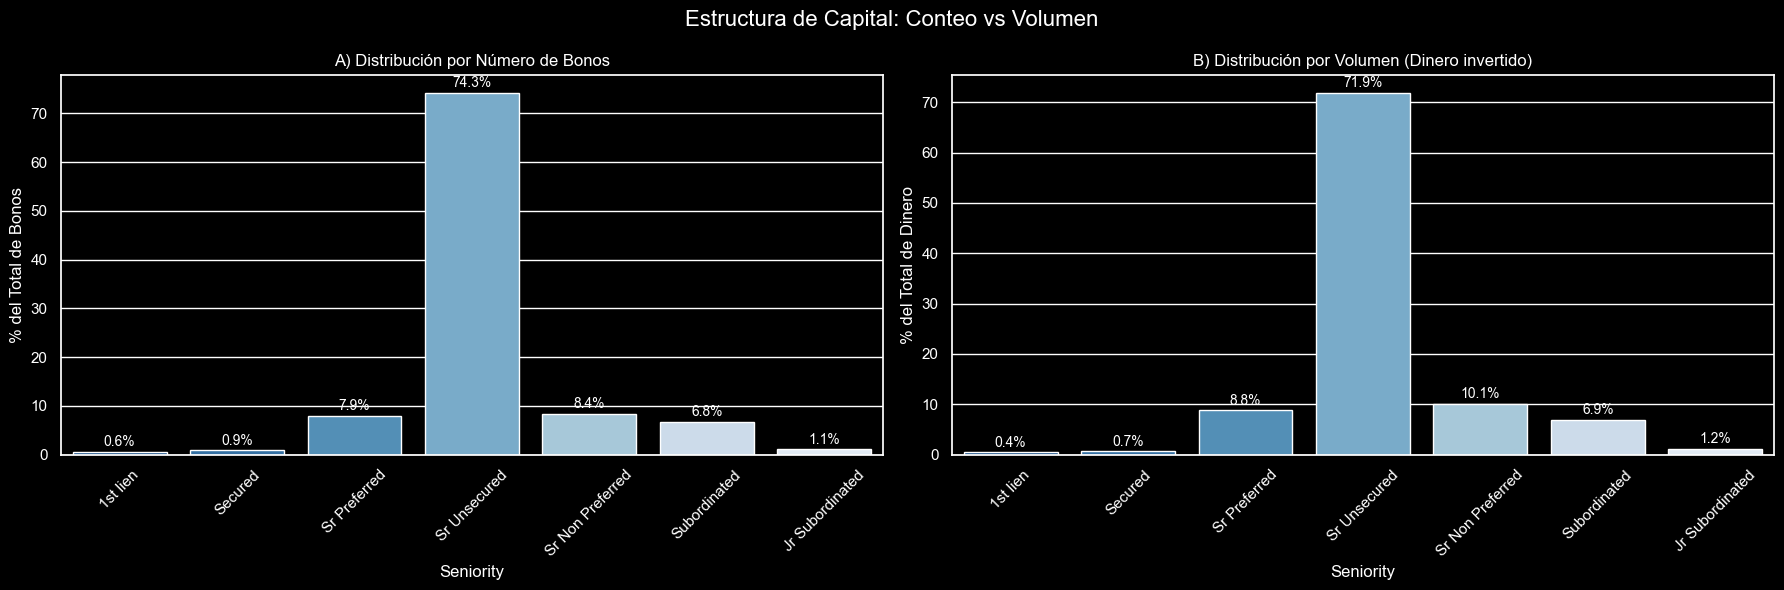

In [164]:
# --- SENIORITY: Comparativa Visual ---

# 1. Definir orden lógico
orden_seniority = [
    '1st lien', 'Secured', 'Sr Preferred', 'Sr Unsecured', 
    'Sr Non Preferred', 'Subordinated', 'Jr Subordinated'
]

# 2. Preparar datos agregados y reordenar
df_sen = universo.groupby('Seniority').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
}).reindex(orden_seniority).dropna()

# 3. Calcular porcentajes para que las barras sean comparables
df_sen_pct = df_sen.apply(lambda x: x / x.sum() * 100)

# 4. Visualización
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Estructura de Capital: Conteo vs Volumen', fontsize=16)

# Gráfico A: Count
sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Description'], ax=axes[0], palette='Blues_r')
axes[0].set_title('A) Distribución por Número de Bonos')
axes[0].set_ylabel('% del Total de Bonos')
axes[0].tick_params(axis='x', rotation=45)

# Etiquetas A
for i, v in enumerate(df_sen_pct['Description']):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

# Gráfico B: Volume
sns.barplot(x=df_sen_pct.index, y=df_sen_pct['Outstanding Amount'], ax=axes[1], palette='Blues_r')
axes[1].set_title('B) Distribución por Volumen (Dinero invertido)')
axes[1].set_ylabel('% del Total de Dinero')
axes[1].tick_params(axis='x', rotation=45)

# Etiquetas B
for i, v in enumerate(df_sen_pct['Outstanding Amount']):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### <font color=#808080>Ratings (Riesgo de crédito)</font>

C:\Users\javie\AppData\Local\Temp\ipykernel_47432\1182207922.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Description'], ax=axes[0], palette='RdYlGn_r')
C:\Users\javie\AppData\Local\Temp\ipykernel_47432\1182207922.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Outstanding Amount'], ax=axes[1], palette='RdYlGn_r')


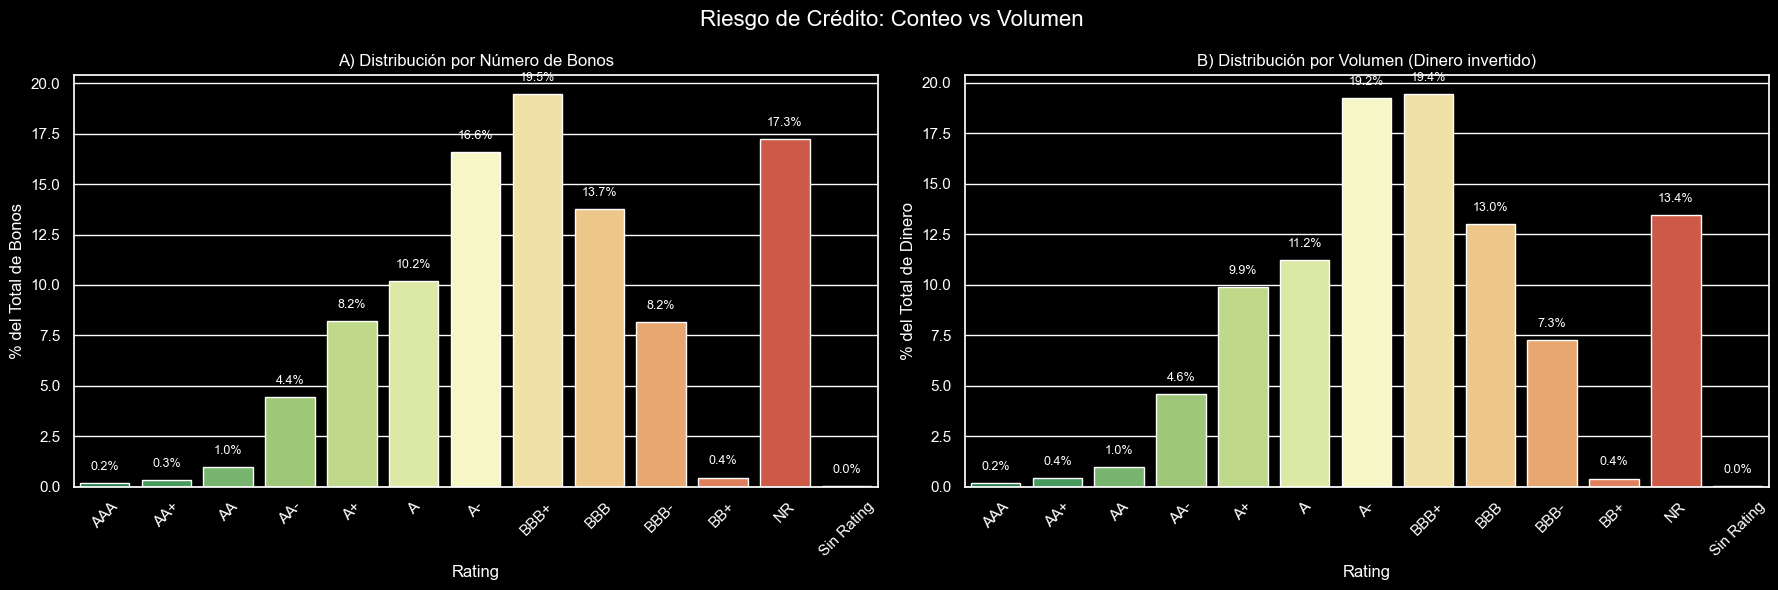

In [165]:
# --- RATINGS: Comparativa Visual ---

# 1. Definir orden lógico
orden_ratings = [
    'AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 
    'BBB+', 'BBB', 'BBB-', 'BB+', 'NR', 'Sin Rating'
]

# 2. Rellenar nulos temporalmente en el DF original para no perder su volumen
df_temp = universo.copy()
df_temp['Rating'] = df_temp['Rating'].fillna('Sin Rating')

# 3. Agrupar, reordenar y calcular porcentajes
df_rat = df_temp.groupby('Rating').agg({
    'Description': 'count', 
    'Outstanding Amount': 'sum'
}).reindex(orden_ratings).dropna()

df_rat_pct = df_rat.apply(lambda x: x / x.sum() * 100)

# 4. Visualización
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Riesgo de Crédito: Conteo vs Volumen', fontsize=16)

# Gráfico A: Count
sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Description'], ax=axes[0], palette='RdYlGn_r')
axes[0].set_title('A) Distribución por Número de Bonos')
axes[0].set_ylabel('% del Total de Bonos')
axes[0].tick_params(axis='x', rotation=45)

# Etiquetas A
for i, v in enumerate(df_rat_pct['Description']):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

# Gráfico B: Volume
sns.barplot(x=df_rat_pct.index, y=df_rat_pct['Outstanding Amount'], ax=axes[1], palette='RdYlGn_r')
axes[1].set_title('B) Distribución por Volumen (Dinero invertido)')
axes[1].set_ylabel('% del Total de Dinero')
axes[1].tick_params(axis='x', rotation=45)

# Etiquetas B
for i, v in enumerate(df_rat_pct['Outstanding Amount']):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### <font color=#808080>Riesgo de liquidez - Horquillas y nominal vivo</font>

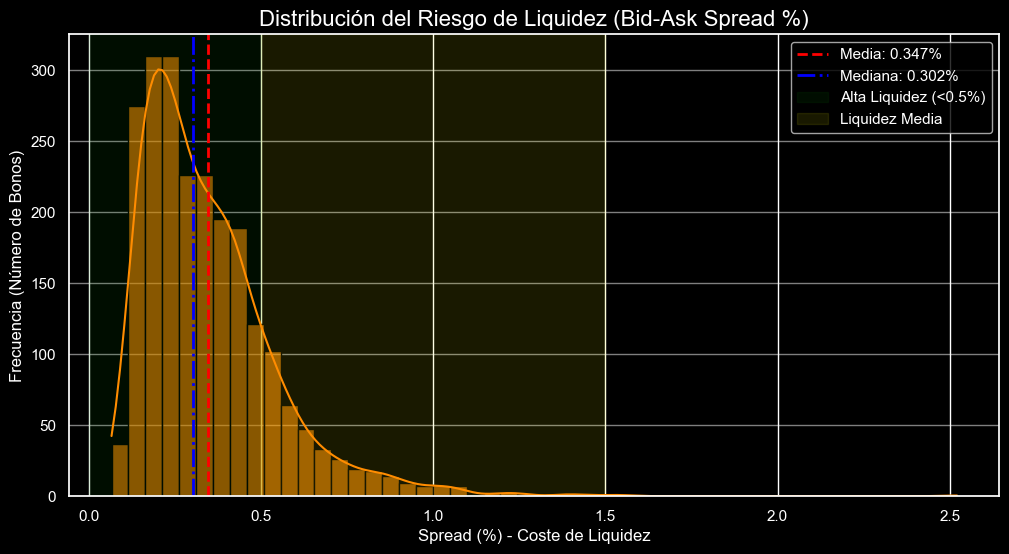

Spread Promedio: 0.347%
Spread Máximo: 2.521% (Posible iliquidez extrema)


In [166]:
# --- Visualización: Riesgo de Liquidez (Bid-Ask Spread) ---

# 1. Calcular el Spread Relativo (%)
# Fórmula: (Precio Venta - Precio Compra) / Precio Medio * 100
# Usamos 'Price' como referencia del precio medio/mercado.
universo['Bid_Ask_Spread_Pct'] = ((universo['Ask Price'] - universo['Bid Price']) / universo['Price']) * 100

# 2. Visualización
plt.figure(figsize=(12, 6))

# Histograma con curva de densidad
# Usamos un degradado o color específico. El naranja suele asociarse a precaución/liquidez.
sns.histplot(
    universo['Bid_Ask_Spread_Pct'], 
    bins=50, 
    kde=True, 
    color='darkorange',
    edgecolor='black',
    alpha=0.6
)

plt.title('Distribución del Riesgo de Liquidez (Bid-Ask Spread %)', fontsize=16)
plt.xlabel('Spread (%) - Coste de Liquidez')
plt.ylabel('Frecuencia (Número de Bonos)')

# 3. Añadir líneas de referencia (Media y Mediana)
mean_spread = universo['Bid_Ask_Spread_Pct'].mean()
median_spread = universo['Bid_Ask_Spread_Pct'].median()

plt.axvline(mean_spread, color='red', linestyle='--', linewidth=2, label=f"Media: {mean_spread:.3f}%")
plt.axvline(median_spread, color='blue', linestyle='-.', linewidth=2, label=f"Mediana: {median_spread:.3f}%")

# 4. Añadir zonas de interpretación (Opcional pero recomendado para prácticas)
# Asumiendo que >1% ya es poca liquidez en bonos corporativos IG/Gov
plt.axvspan(0, 0.5, color='green', alpha=0.1, label='Alta Liquidez (<0.5%)')
plt.axvspan(0.5, 1.5, color='yellow', alpha=0.1, label='Liquidez Media')
# El resto se deja sin sombrear o se sombrea en rojo si se conoce el límite superior

plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# Estadísticas rápidas para comentar en el texto
print(f"Spread Promedio: {mean_spread:.3f}%")
print(f"Spread Máximo: {universo['Bid_Ask_Spread_Pct'].max():.3f}% (Posible iliquidez extrema)")

C:\Users\javie\AppData\Local\Temp\ipykernel_47432\77205319.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


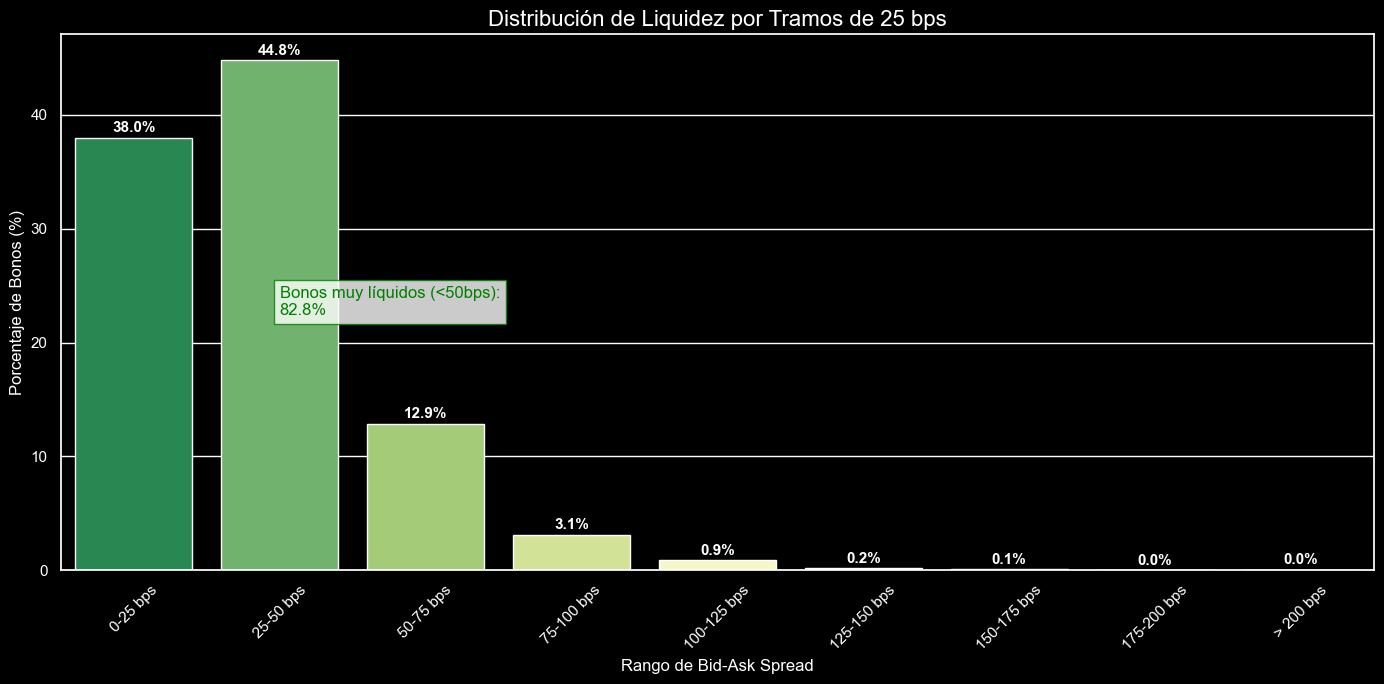

In [167]:
# --- Visualización: Liquidez por Rangos (Buckets de 25 bps) ---
import numpy as np

# 1. Asegurarnos de que tenemos la columna calculada (por si se ejecuta celda aislada)
if 'Bid_Ask_Spread_Pct' not in universo.columns:
     universo['Bid_Ask_Spread_Pct'] = ((universo['Ask Price'] - universo['Bid Price']) / universo['Price']) * 100

# 2. Definir los tramos (bins) de 25 en 25 bps
# 0.25% = 25 bps. Creamos cortes hasta 2.0% (200 bps) y un corte final al infinito.
bins = [0, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, float('inf')]

# Etiquetas para los tramos
labels = [
    '0-25 bps', '25-50 bps', '50-75 bps', '75-100 bps', 
    '100-125 bps', '125-150 bps', '150-175 bps', '175-200 bps', '> 200 bps'
]

# 3. Crear la columna de rangos
# Usamos pd.cut para asignar cada bono a su bucket
universo['Liquidity_Bucket'] = pd.cut(universo['Bid_Ask_Spread_Pct'], bins=bins, labels=labels, right=False)

# 4. Calcular porcentajes
liquidity_dist = universo['Liquidity_Bucket'].value_counts(normalize=True).sort_index() * 100

# 5. Visualización
plt.figure(figsize=(14, 7))

# Usamos una paleta divergente: Verdes (líquido) -> Amarillos -> Rojos (ilíquido)
# Como tenemos 9 categorías, generamos una paleta dinámica
ax = sns.barplot(
    x=liquidity_dist.index, 
    y=liquidity_dist.values, 
    palette='RdYlGn_r' # Invertido: Verde al principio (bajo spread), Rojo al final
)

plt.title('Distribución de Liquidez por Tramos de 25 bps', fontsize=16)
plt.xlabel('Rango de Bid-Ask Spread')
plt.ylabel('Porcentaje de Bonos (%)')
plt.xticks(rotation=45)

# 6. Añadir etiquetas de porcentaje sobre las barras
for i, v in enumerate(liquidity_dist.values):
    # Ponemos el texto un poco por encima de la barra
    ax.text(i, v + 0.2, f'{v:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Línea acumulada (Opcional, pero muy útil): ¿Qué % está por debajo de 50bps?
# Esto dibuja una línea invisible solo para calcular el dato acumulado
acumulado_50bps = liquidity_dist['0-25 bps'] + liquidity_dist['25-50 bps']
plt.text(1, liquidity_dist.max()/2, f'Bonos muy líquidos (<50bps):\n{acumulado_50bps:.1f}%', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='green'), fontsize=12, color='green')

plt.tight_layout()
plt.show()

#### <font color=#808080>Resto de información</font>

En esta sección, analizamos el resto de ficheros para ver qué información tenemos y, en caso de haber *gaps*, limpiar los datos antes de trabajar con ellos.

##### <font color=#CC6600>Precios bonos universo</font>

In [168]:
import pandas as pd
import numpy as np

def procesar_precios_bonos(df_precios, df_universo):
    """
    Realiza la limpieza integral de la serie de precios de bonos.
    Retorna: DataFrame limpio y un diccionario con métricas del proceso.
    """
    # --- 1. PREPARACIÓN DE TIPOS DE DATOS ---
    print("1. Iniciando conversión de tipos...")
    
    # Copias para no afectar los originales
    precios = df_precios.copy()
    universo = df_universo.copy()
    
    # A) Precios: Índice a Datetime y Valores a Numérico
    precios.index = pd.to_datetime(precios.index, dayfirst=True)
    precios = precios.sort_index()
    precios = precios.apply(pd.to_numeric, errors='coerce')
    
    # B) Universo: Maturity a Datetime
    universo['Maturity'] = pd.to_datetime(universo['Maturity'], errors='coerce')

    # --- 2. FILTRADO DE CALENDARIO (Fines de semana y Festivos) ---
    print("2. Filtrando días no laborables y festivos...")
    
    dims_inicial = precios.shape
    
    # A) Eliminar Sábados (5) y Domingos (6)
    precios = precios[precios.index.dayofweek < 5]
    
    # B) Eliminar filas que estén TOTALMENTE vacías (Festivos comunes)
    precios = precios.dropna(how='all')
    
    dims_trading = precios.shape
    dias_eliminados = dims_inicial[0] - dims_trading[0]

    # --- 3. IMPUTACIÓN ROBUSTA (FFILL + MÁSCARA DE VENCIMIENTO) ---
    print("3. Aplicando Forward Fill con control de Vencimientos...")
    
    # Paso A: Forward Fill "ciego"
    precios_ffill = precios.ffill()
    
    # Paso B: Crear Mapa de Vencimientos para búsqueda rápida
    # Intentamos alinear índices o usar columna Description
    if set(precios.columns).issubset(set(universo.index)):
        map_vencimientos = universo['Maturity'].to_dict()
    elif 'Description' in universo.columns:
        # Si el identificador está en la columna Description
        # Aseguramos que no haya duplicados que rompan el to_dict
        temp_uni = universo.drop_duplicates(subset='Description').set_index('Description')
        map_vencimientos = temp_uni['Maturity'].to_dict()
    else:
        print("ADVERTENCIA: No se pudo alinear columnas. Se omite el corte por vencimiento.")
        map_vencimientos = {}

    # Paso C: Aplicar la Máscara de Vencimiento
    precios_clean = precios_ffill.copy()
    datos_zombis_eliminados = 0
    
    # Iteramos columnas
    for bono in precios_clean.columns:
        fecha_vencimiento = map_vencimientos.get(bono)
        
        # Si tenemos fecha y es válida
        if pd.notna(fecha_vencimiento):
            mask_zombie = precios_clean.index > fecha_vencimiento
            
            # Contamos cuántos datos eran "zombis" (no nulos antes de borrar)
            datos_zombis_eliminados += precios_clean.loc[mask_zombie, bono].notna().sum()
            
            # Matamos al zombie (NaN)
            precios_clean.loc[mask_zombie, bono] = np.nan

    # --- 4. RESUMEN FINAL ---
    resumen = {
        'Filas Originales': dims_inicial[0],
        'Filas Finales (Trading Days)': dims_trading[0],
        'Días Eliminados': dias_eliminados,
        'Celdas Zombie Corregidas': datos_zombis_eliminados, # Clave corregida (sin comillas internas)
        'Nulos restantes': precios_clean.isnull().sum().sum(),
        'Forma Final': precios_clean.shape
    }
    
    return precios_clean, resumen

# --- EJECUCIÓN ---
precios_clean, reporte = procesar_precios_bonos(precios_historicos_universo, universo)

# --- INFORME DE RESULTADOS ---
print("-" * 50)
print("RESUMEN DEL PROCESO DE LIMPIEZA")
print("-" * 50)
print(f"1. Estructura Temporal:")
print(f"   - Días originales en la serie: {reporte['Filas Originales']}")
print(f"   - Días hábiles finales:        {reporte['Filas Finales (Trading Days)']}")
print(f"   - Días eliminados (Sáb/Dom):   {reporte['Días Eliminados']}")
print("-" * 50)
print(f"2. Calidad del Dato (Sanitización):")
# Ahora la clave coincide exactamente
print(f"   - Se han eliminado {reporte['Celdas Zombie Corregidas']} precios que existían después del vencimiento.")
print(f"   - Se han mantenido los precios mediante 'forward-fill' durante la vida activa del bono.")
print("-" * 50)
print(f"3. Resultado Final:")
print(f"   - Dimensiones del DataFrame limpio: {reporte['Forma Final']}")
print("-" * 50)

# Verificación rápida
print("\nMuestra de datos limpios (Cola):")
print(precios_clean.iloc[-5:, :5])

1. Iniciando conversión de tipos...
2. Filtrando días no laborables y festivos...
3. Aplicando Forward Fill con control de Vencimientos...
--------------------------------------------------
RESUMEN DEL PROCESO DE LIMPIEZA
--------------------------------------------------
1. Estructura Temporal:
   - Días originales en la serie: 732
   - Días hábiles finales:        523
   - Días eliminados (Sáb/Dom):   209
--------------------------------------------------
2. Calidad del Dato (Sanitización):
   - Se han eliminado 0 precios que existían después del vencimiento.
   - Se han mantenido los precios mediante 'forward-fill' durante la vida activa del bono.
--------------------------------------------------
3. Resultado Final:
   - Dimensiones del DataFrame limpio: (523, 2255)
--------------------------------------------------

Muestra de datos limpios (Cola):
Date        XS0161488498 Corp  FR0000471930 Corp  XS0162513211 Corp  \
2025-09-25           127.4310           130.8840            115

C:\Users\javie\AppData\Local\Temp\ipykernel_47432\3481345806.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  universo['Maturity'] = pd.to_datetime(universo['Maturity'], errors='coerce')


##### <font color=#CC6600>Otros precios</font>

Para terminar con el análisis de datos, falta lo leído en los ficheros de *"precios_historicos_varios.csv"* y *curvaESTR.csv*.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 1. HERRAMIENTAS COMUNES (HELPER FUNCTIONS)
# ==============================================================================

def limpieza_base_timeseries(df_input, nombre="DataFrame"):
    """
    Realiza la higiene básica de series temporales:
    1. Índice a Datetime.
    2. Orden cronológico.
    3. Conversión a numérico.
    4. Eliminación de fines de semana y festivos vacíos.
    """
    print(f"   -> Iniciando limpieza base para: {nombre}...")
    df = df_input.copy()
    
    # 1. Ajuste del Índice
    if 'Date' in df.columns:
        df = df.set_index('Date')
    df.index = pd.to_datetime(df.index, dayfirst=True)
    df = df.sort_index()
    
    # 2. Conversión a Numérico (Manejo de errores y comas decimales si las hubiera)
    # Si tus datos vienen con coma decimal (ej "98,5"), descomenta: 
    # df = df.replace(',', '.', regex=True)
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # 3. Filtrado de Calendario (Trading Days Only)
    # Quitamos Sábados (5) y Domingos (6)
    df = df[df.index.dayofweek < 5]
    
    # Quitamos filas que sean todo NaN (Festivos donde no hubo mercado)
    df = df.dropna(how='all')
    
    print(f"      Dimensión tras limpieza base: {df.shape}")
    return df

# ==============================================================================
# 2. PROCESAMIENTO ESPECÍFICO POR DATASET
# ==============================================================================

def procesar_bonos(df_precios, df_universo):
    """
    Procesa precios de bonos: Limpieza base + Ffill + Máscara de Vencimiento.
    """
    print("--- [1/3] Procesando Precios de Bonos ---")
    
    # A) Limpieza Base
    precios = limpieza_base_timeseries(df_precios, "Bonos Históricos")
    
    # B) Imputación de iliquidez (Forward Fill)
    precios = precios.ffill()
    
    # C) Máscara de Vencimiento (Anti-Zombies)
    print("      Aplicando máscara de vencimientos (eliminando precios post-maturity)...")
    
    # Preparar mapa de vencimientos
    # Aseguramos formato fecha en universo
    df_universo = df_universo.copy()
    df_universo['Maturity'] = pd.to_datetime(df_universo['Maturity'], errors='coerce')
    
    # Creamos diccionario {Id_Bono: Fecha_Vencimiento}
    # Intentamos buscar por índice o columna Description
    if set(precios.columns).issubset(set(df_universo.index)):
        map_vencimientos = df_universo['Maturity'].to_dict()
    elif 'Description' in df_universo.columns:
        temp = df_universo.drop_duplicates(subset='Description').set_index('Description')
        map_vencimientos = temp['Maturity'].to_dict()
    else:
        print("      ⚠️ ADVERTENCIA: No se pudo mapear vencimientos. Se omite este paso.")
        map_vencimientos = {}

    # Aplicar corte
    zombis_count = 0
    for bono in precios.columns:
        fecha_vencimiento = map_vencimientos.get(bono)
        if pd.notna(fecha_vencimiento):
            mask_zombie = precios.index > fecha_vencimiento
            if mask_zombie.any():
                zombis_count += precios.loc[mask_zombie, bono].notna().sum()
                precios.loc[mask_zombie, bono] = np.nan
                
    print(f"      Datos 'Zombie' eliminados: {zombis_count}")
    return precios

def procesar_mercado(df_mercado, df_bonos_referencia):
    """
    Procesa precios de mercado: Limpieza base + Alineación estricta con Bonos.
    """
    print("--- [2/3] Procesando Variables de Mercado (Indices) ---")
    
    # A) Limpieza Base
    mercado = limpieza_base_timeseries(df_mercado, "Variables de Mercado")
    
    # B) Alineación (Intersección de fechas)
    print("      Alineando fechas con el DataFrame de Bonos...")
    fechas_comunes = df_bonos_referencia.index.intersection(mercado.index)
    
    mercado_aligned = mercado.loc[fechas_comunes]
    
    # Nota: También debemos recortar los bonos si el mercado tiene menos historia
    # Pero asumiremos que queremos ajustar el mercado a los bonos. 
    # Lo ideal es devolver ambos recortados a la intersección, lo haremos en el bloque principal.
    
    return mercado_aligned

def procesar_curva_estr(df_curva):
    """
    Procesa Curva ESTR: Nodos -> Diaria (Business Days) -> Interpolación Log-Linear.
    """
    print("--- [3/3] Procesando Curva ESTR ---")
    
    # A) Preparación básica (Sin filtrar fines de semana aun, necesitamos resamplear)
    curva = df_curva.copy()
    if 'Date' in curva.columns:
        curva = curva.set_index('Date')
    curva.index = pd.to_datetime(curva.index, dayfirst=True)
    curva = curva.sort_index()
    
    # B) Resampling a Días Laborables (Business Days)
    curva_diaria = curva.asfreq('B')
    
    # C) Interpolación (Rates: Linear / Discount: Log-Linear) + Backfill
    # Tasas
    for col in ['Market Rate', 'Zero Rate']:
        if col in curva_diaria.columns:
            # Interpolación en el tiempo + Relleno hacia atrás (Flat start) + Relleno final
            curva_diaria[col] = curva_diaria[col].interpolate(method='time').bfill().ffill()
            
    # Descuentos (Log-Linear para respetar convexidad)
    if 'Discount' in curva_diaria.columns:
        curva_diaria['Log_Disc'] = np.log(curva_diaria['Discount'])
        # Interpolamos Logaritmo
        curva_diaria['Log_Disc'] = curva_diaria['Log_Disc'].interpolate(method='time').bfill().ffill()
        # Exponencial
        curva_diaria['Discount'] = np.exp(curva_diaria['Log_Disc'])
        curva_diaria = curva_diaria.drop(columns=['Log_Disc'])
        
    print(f"      Curva expandida de {len(curva)} nodos a {len(curva_diaria)} días laborables.")
    return curva_diaria

# ==============================================================================
# 3. EJECUCIÓN DEL FLUJO DE TRABAJO
# ==============================================================================

# 1. Procesar Bonos (Master Clean)
df_bonos_clean = procesar_bonos(precios_historicos_universo, universo)

# 2. Procesar Mercado y Alinear con Bonos
# Primero limpiamos mercado
df_mercado_temp = procesar_mercado(precios_historicos_varios, df_bonos_clean)

# AHORA: Intersección final estricta (Cortamos AMBOS a las fechas comunes)
common_dates = df_bonos_clean.index.intersection(df_mercado_temp.index)
df_bonos_final = df_bonos_clean.loc[common_dates]
df_mercado_final = df_mercado_temp.loc[common_dates]

# 3. Procesar Curva ESTR (Independiente, mira al futuro)
df_curva_final = procesar_curva_estr(curvaESTR)


# ==============================================================================
# 4. TESTEO Y VALIDACIÓN (Quality Check)
# ==============================================================================
print("\n" + "="*50)
print("RESULTADOS DEL PROCESADO Y VALIDACIÓN")
print("="*50)

# Check 1: Alineación Histórica
aligned_ok = df_bonos_final.index.equals(df_mercado_final.index)
print(f"[Check 1] Alineación Bonos vs Mercado: {'✅ CORRECTO' if aligned_ok else '❌ ERROR'}")
if aligned_ok:
    print(f"          Rango Fechas: {df_bonos_final.index.min().date()} a {df_bonos_final.index.max().date()}")
    print(f"          Filas Totales: {len(df_bonos_final)}")

# Check 2: Calidad Curva ESTR
nans_curva = df_curva_final.isnull().sum().sum()
print(f"[Check 2] Calidad Curva ESTR: {'✅ LIMPIA' if nans_curva == 0 else f'❌ TIENE {nans_curva} NaNs'}")
print(f"          Inicio Curva (Primeras 3 filas):")
print(df_curva_final[['Zero Rate', 'Discount']].head(3))

# Check 3: Integridad de Vencimientos (Muestra)
# Cogemos un bono aleatorio y verificamos que el último dato no sea posterior a su madurez
import random
bono_test = random.choice(df_bonos_final.columns)
# Buscamos su madurez (asumiendo alineación previa o búsqueda segura)
try:
    if bono_test in universo.index:
        mat_date = pd.to_datetime(universo.loc[bono_test, 'Maturity'])
    else:
        mat_date = pd.to_datetime(universo.loc[universo['Description']==bono_test, 'Maturity'].iloc[0])
    
    last_price_date = df_bonos_final[bono_test].dropna().index.max()
    
    # Si la fecha del último precio es <= madurez (o el bono no ha vencido aun), está bien
    zombie_check = last_price_date <= mat_date if pd.notna(mat_date) else True
    # Si last_price_date es NaT (bono vacío), también es válido (no hay zombis)
    if pd.isna(last_price_date): zombie_check = True 
    
    print(f"[Check 3] Test Anti-Zombie (Bono {bono_test}):")
    print(f"          Vencimiento: {mat_date.date() if pd.notna(mat_date) else 'N/A'}")
    print(f"          Último Precio: {last_price_date.date() if pd.notna(last_price_date) else 'Sin Datos'}")
    print(f"          Estado: {'✅ CORRECTO' if zombie_check else '❌ ERROR: PRECIO POST-VENCIMIENTO DETECTADO'}")

except Exception as e:
    print(f"[Check 3] No se pudo verificar bono individual: {e}")

print("="*50)

--- [1/3] Procesando Precios de Bonos ---
   -> Iniciando limpieza base para: Bonos Históricos...
      Dimensión tras limpieza base: (523, 2255)
      Aplicando máscara de vencimientos (eliminando precios post-maturity)...
      Datos 'Zombie' eliminados: 0
--- [2/3] Procesando Variables de Mercado (Indices) ---
   -> Iniciando limpieza base para: Variables de Mercado...
      Dimensión tras limpieza base: (514, 6)
      Alineando fechas con el DataFrame de Bonos...
--- [3/3] Procesando Curva ESTR ---


C:\Users\javie\AppData\Local\Temp\ipykernel_47432\3424665428.py:63: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_universo['Maturity'] = pd.to_datetime(df_universo['Maturity'], errors='coerce')


      Curva expandida de 33 nodos a 13047 días laborables.

RESULTADOS DEL PROCESADO Y VALIDACIÓN
[Check 1] Alineación Bonos vs Mercado: ✅ CORRECTO
          Rango Fechas: 2023-10-02 a 2025-10-01
          Filas Totales: 514
[Check 2] Calidad Curva ESTR: ✅ LIMPIA
          Inicio Curva (Primeras 3 filas):
            Zero Rate  Discount
Date                           
2025-10-01     1.9535  1.000000
2025-10-02     1.9535  0.999946
2025-10-03     1.9535  0.999893
[Check 3] No se pudo verificar bono individual: single positional indexer is out-of-bounds


In [169]:


# --- 1. PREPARACIÓN (Asegurar formatos) ---
# Aseguramos una última vez que son Datetime y están ordenados
precios_clean.index = pd.to_datetime(precios_clean.index, dayfirst=True)
precios_historicos_varios.index = pd.to_datetime(precios_historicos_varios.index, dayfirst=True)

precios_clean = precios_clean.sort_index()
precios_historicos_varios = precios_historicos_varios.sort_index()

# --- 2. CÁLCULO DE LA INTERSECCIÓN ---
# Identificamos las fechas que existen en AMBOS dataframes simultáneamente
fechas_comunes = precios_clean.index.intersection(precios_historicos_varios.index)

print(f"Fechas en Bonos (limpio): {len(precios_clean)}")
print(f"Fechas en Varios (bruto): {len(precios_historicos_varios)}")
print(f"Fechas Comunes (final):   {len(fechas_comunes)}")

# --- 3. ALINEACIÓN (Slicing) ---
# Sobrescribimos o creamos nuevas variables quedándonos solo con las fechas comunes
precios_bonos_aligned = precios_clean.loc[fechas_comunes].copy()
precios_varios_aligned = precios_historicos_varios.loc[fechas_comunes].copy()

# --- 4. VERIFICACIÓN FINAL ---
print("-" * 40)
print("Estado Final de la Alineación:")
print(f"Dimensiones Bonos:  {precios_bonos_aligned.shape}")
print(f"Dimensiones Varios: {precios_varios_aligned.shape}")

# Comprobación estricta de igualdad de índices
if precios_bonos_aligned.index.equals(precios_varios_aligned.index):
    print("\n✅ ÉXITO: Los índices temporales son idénticos.")
    print(f"Rango de fechas: {precios_bonos_aligned.index.min().date()} a {precios_bonos_aligned.index.max().date()}")
else:
    print("\n❌ ERROR: Los índices siguen sin coincidir.")


Fechas en Bonos (limpio): 523
Fechas en Varios (bruto): 514
Fechas Comunes (final):   514
----------------------------------------
Estado Final de la Alineación:
Dimensiones Bonos:  (514, 2255)
Dimensiones Varios: (514, 6)

✅ ÉXITO: Los índices temporales son idénticos.
Rango de fechas: 2023-10-02 a 2025-10-01


Verificación de los primeros 10 días (Sin NaNs):
            Market Rate  Zero Rate  Discount
Date                                        
2025-10-01     1.927000   1.953500  1.000000
2025-10-02     1.927000   1.953500  0.999946
2025-10-03     1.927000   1.953500  0.999893
2025-10-06     1.927000   1.953500  0.999732
2025-10-07     1.927000   1.953500  0.999679
2025-10-08     1.927000   1.953500  0.999625
2025-10-09     1.927000   1.953500  0.999572
2025-10-10     1.927000   1.953500  0.999518
2025-10-13     1.927429   1.953723  0.999358
2025-10-14     1.927571   1.953797  0.999304


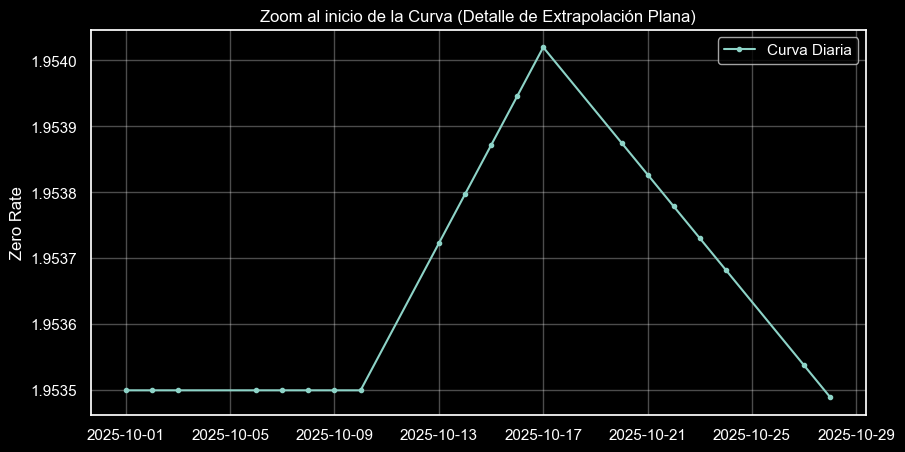

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def procesar_curva_estr(df_input):
    """
    1. Limpia y convierte fechas del input original.
    2. Genera la curva diaria interpolada.
    3. Soluciona los NaNs iniciales mediante Extrapolación Plana (Backfill).
    """
    # --- 1. LIMPIEZA ---
    nodos_originales = df_input.copy()
    
    if 'Date' in nodos_originales.columns:
        nodos_originales = nodos_originales.set_index('Date')
        
    nodos_originales.index = pd.to_datetime(nodos_originales.index, dayfirst=True)
    nodos_originales = nodos_originales.sort_index()
    
    # --- 2. RESAMPLING ---
    curva_diaria = nodos_originales.asfreq('B')
    
    # --- 3. INTERPOLACIÓN DE TASAS (Linear + Backfill) ---
    cols_tasas = ['Market Rate', 'Zero Rate']
    
    for col in cols_tasas:
        if col in curva_diaria.columns:
            # A) Rellenar huecos intermedios
            curva_diaria[col] = curva_diaria[col].interpolate(method='time')
            
            # B) Rellenar huecos iniciales (Flat Extrapolation)
            # Copiamos el primer dato válido hacia atrás
            curva_diaria[col] = curva_diaria[col].bfill()
            
            # C) Rellenar huecos finales (opcional, por seguridad)
            curva_diaria[col] = curva_diaria[col].ffill()

    # --- 4. INTERPOLACIÓN DE DESCUENTOS (Log-Linear) ---
    if 'Discount' in curva_diaria.columns:
        # A) Logaritmo
        curva_diaria['Log_Discount'] = np.log(curva_diaria['Discount'])
        
        # B) Interpolación
        curva_diaria['Log_Discount'] = curva_diaria['Log_Discount'].interpolate(method='time')
        
        # C) Extrapolación de Descuentos (Backfill/Forwardfill del logaritmo)
        # Es necesario para que no queden NaNs en el Log_Discount antes de hacer la exponencial
        curva_diaria['Log_Discount'] = curva_diaria['Log_Discount'].bfill().ffill()
        
        # D) Exponencial
        curva_diaria['Discount'] = np.exp(curva_diaria['Log_Discount'])
        
        curva_diaria = curva_diaria.drop(columns=['Log_Discount'])

    return curva_diaria, nodos_originales

# --- EJECUCIÓN Y VERIFICACIÓN ---
curva_estr_diaria, nodos_limpios = procesar_curva_estr(curvaESTR)

print("Verificación de los primeros 10 días (Sin NaNs):")
print(curva_estr_diaria.head(10))

# Visualización para confirmar la línea plana al inicio
plt.figure(figsize=(10, 5))
plt.plot(curva_estr_diaria.index[:20], curva_estr_diaria['Zero Rate'][:20], marker='.', label='Curva Diaria')
plt.title('Zoom al inicio de la Curva (Detalle de Extrapolación Plana)')
plt.ylabel('Zero Rate')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### <font color=#336699>2. Valoración</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 En esta sección, valoraremos los bonos utilizando la curva. Para ello, crea una función (puedes hacerlo en un .py aparte) que con las **características del bono, la curva y un spread de crédito** devuelva la valoración del bono (incluyendo **precio limpio, cupón corrido y precio sucio**).

Si asumimos que el **spread de crédito es 0**, y la ejecutamos para el 01/10/2025...
- ¿Qué observas si comparas los precios obtenidos y los precios de mercado? 
- ¿Crees que la diferencia se debe a un factor relacionado sólo con el riesgo crediticio?
- ¿Qué otros factores influyen en ese spread?

Para la valoración, haz las siguientes simplificaciones:

- Asume que el vencimiento de los bonos perpetuos (para los que no hay vencimiento) es la próxima fecha call.
- Asume que todos aquellos bonos que tengan call serán calleados. Por lo tanto, usa la fecha call como fecha de vencimiento.
- Asume que los cupones son fijos hasta vencimiento (aunque alguno cambie a lo largo de la vida del bono).
- Usa la base de cálculo ACT/365. No tengas en cuenta la convención de día hábil.

Ten en cuenta que necesitarás una función de interpolación también. Interpola los factores de descuento exponencialmente.

</div>

In [171]:
# Establecemos la fecha
fecha_valor = datetime.datetime(2025,10,1)

### <font color=#336699>3. Spread</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Calculemos ahora los spreads que debemos añadir a la curva con un movimiento paralelo para que cuadren los precios de mercado que tenemos. Para ello, usa la función de valoración del apartado anterior. 
- ¿Qué observas? ¿Tienen sentido los resultados? 
- ¿Con qué datos de los que tenemos compararías para ver si los resultados son coherentes?

</div>

### <font color=#336699>4. YTM, Duración, Convexidad</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Calculemos ahora la siguiente información, también relacionada con la rentabilidad y riesgo de las emisiones:
- *Yield* - Por simplicidad, en este caso, en el caso de los bonos callable, nos quedaremos con la fecha call, como en el ejercicio anterior. Usa las mismas asunciones que para la valoración y el spread.
- Duración
- Convexidad

Responde a las siguientes preguntas:
- ¿Que relación hay entre la TIR calculada y el spread calculado en el apartado anterior?
- ¿Qué relación hay entre la duración y el vencimiento? ¿Qué refleja la duración? ¿De qué otra forma se podría obtener esta sensibilidad?
- Estima el precio del bono usando la duración y convexidad, ¿qué observas?

</div>

### <font color=#336699>5. Cartera equiponderada</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Crea un algoritmo de inversión que consista en una cartera equiponderada, asignando el mismo peso a todos los bonos vivos en cada fecha de rebalanceo.

Asume rebalanceo mensual, y que no tenemos costes más allá de los implícitos en el propio precio, calcula la evolución que hubiese tenido tu algoritmo. Por simplificación, utiliza los precios MID que se te dan.

Asumiendo que el benchmark de la cartera es el índice que se nos da: *RECMTREU Index*. Contrasta la evolución de tú cartera contra dicho benchmark. Ten cuidado porque es un índice *Total Return*.

- ¿Qué sería lo más correcto en lugar de utilizar los precios MID?
- ¿Se te ocurre algún otro benchmark que se podría utilizar?

</div>

### <font color=#336699>6. Cartera mandato</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Como adelantábamos en el enunciado, tienes el mandato de construir una cartera de como máximo **20** bonos corporativos con ese universo y una serie de restricciones y, claro, maximizando la rentabilidad total de la cartera:
- La duración de la cartera no debe superar los 3 años
- La exposición a emisiones HY no puede superar el 10% de la cartera
- No puedes invertir en deuda subordinada
- No se puede invertir en emisiones de tamaño igual o inferior a 500 millones
- No se puede invertir más de un 10% del capital en una misma emisión
- No puede haber más de un 15% de concentración en un mismo emisor
(¡OJO! No estamos teniendo en cuenta en este ejercicio si hubiera un mínimo de inversión, lo cuál sería un dato relevante tener en cuenta en un caso real)

1. Teniendo en cuenta la naturaleza que nos están pidiendo para la cartera, ¿añadirías alguna otra restricción?

2. ¿Cómo medirías el riesgo de crédito de la cartera?

3. ¿Cómo medirías el riesgo de liquidez de la cartera? ¿Se te ocurre alguna otra información que se podría utilizar aunque no se te haya dado?

4. Describe cómo habría que hacer el backtest de esta cartera, no hace falta que lo implementes en este caso

</div>

##### <font color=#CC6600>Riesgo de crédito</font>

##### <font color=#CC6600>Riesgo de liquidez</font>

##### <font color=#CC6600>Backtest</font>

### <font color=#336699>7. Cobertura tipos de interés</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Utiliza alguno de los siguientes instrumentos de los que te hemos dado para cubrir la duración (sensibilidad de tipos de interés) de la cartera que has construido según el mandato. Asume una inversión en la cartera de 10 millones:

- Futuros sobre el *Schatz* (ticker: DU1) - Duración a 01/10/2025: 1.92
- Futuros sobre el *BOBL* (ticker: OE1) - Duración a 01/10/2025: 5.44
- Futuros sobre el *BUND* (ticker: RX1) - Duración a 01/10/2025: 10

*Contract size* en todos los casos: 100,000 euros

Investiga sobre estos instrumentos antes de tomar la decisión. Razona tu elección del instrumento y el número de contratos que has decidido comprar/vender.

- ¿Qué pasaría si comprásemos/vendiésemos 100 futuros?
- ¿Se te ocurre algún otro instrumento con el que cubrir la sensibilidad a los tipos de interés de la cartera?

</div>

### <font color=#336699>8. Cobertura crédito</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Utiliza alguno de los siguientes instrumentos de los que te hemos dado para cubrir el riesgo de crédito de la cartera que has construido según el mandato. Asume una inversión en la cartera de 10 millones:

- ITRAXX Main (ticker: ITRX EUR CDSI GEN 5Y Corp)
- ITRAXX XOVER (ticker: ITRX XOVER CDSI GEN 5Y Corp)

Estos índices cotizan en forma de spread, en puntos básicos. La sensibilidad del valor del swap (CDS) la vamos a asumir en 4,500€ al punto básico asumiendo una inversión de 10 millones.

Investiga sobre estos instrumentos antes de tomar la decisión. Razona tu elección del instrumento y el nominal que has decidido comprar/vender.

- ¿Tiene sentido plantear esta cobertura total?
- ¿Con qué otros instrumentos podrías cubrir el riesgo de crédito?

</div>

### <font color=#336699>9. Estrategia propia</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Plantea tu propia estrategia con la información que tienes. Puede ser una estrategia direccional, de valor relativo, que hayas visto o no en clase; pero siempre razonando tu planteamiento.

</div>